In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data
import data_true

In [2]:
data = np.array(data.values)
print(data.shape)

data_true = np.array(data_true.values)
print(data_true.shape)

(51, 51)
(51, 51)


In [3]:
#print(data.T[32])

In [4]:
def plot(data, grid):
    plt.plot(grid[::-1], data[16], label="Срез в x=0.16")
    # на графике из условия перепутаны оси
    plt.plot(grid[::-1], data[32], label="Срез в x=0.32")
    plt.plot(grid, data.T[16], label="Срез в y=0.16")
    # Только в срезе по x
    plt.plot(grid, data.T[32], label="Срез в y=0.32")

    plt.scatter(grid[::-1], data[16], marker="s") 
    # на графике из условия перепутаны оси
    plt.scatter(grid[::-1], data[32], marker="o")
    plt.scatter(grid, data.T[16], marker="+")
    # Только в срезе по x
    plt.scatter(grid, data.T[32], marker="*")

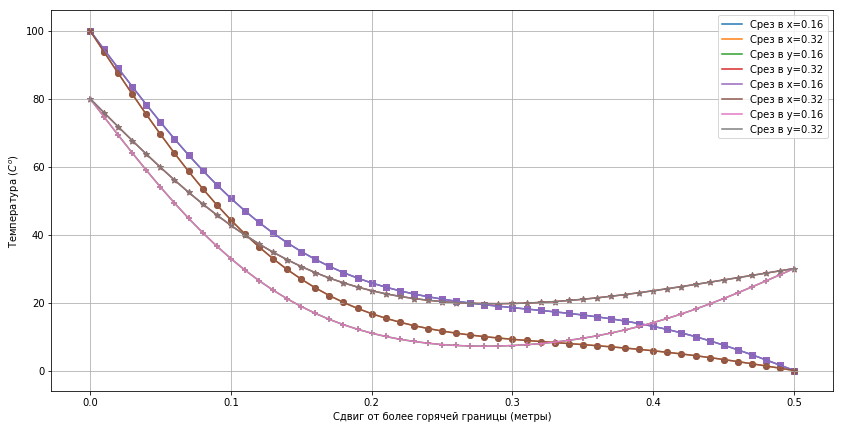

In [6]:
plt.figure(figsize=(14, 7))
grid = np.arange(data.shape[0]) / 100
plot(data, grid)
plot(data_true, grid)  # проверенный график, вычисленный на одном процессе
plt.ylabel("Температура ($C^o$)")
plt.xlabel("Сдвиг от более горячей границы (метры)")
plt.legend()
plt.grid()
plt.savefig('temperature_plot.png', format='png', dpi=300)
plt.show()

_____________________
Ускорение и эффективность

In [7]:
times_on = []
fname_preffix = "time_on_"
fname_suffix = ".txt"
for i in range(1, 13):
    fname = (
        fname_preffix + str(i // 10 + int("0")) +
        str(i % 10 + int("0")) + fname_suffix
    )
    times = []
    with open(fname, "rt") as f:
        for line in f:
            times.append(float(line))
    times.sort()
    times_on.append(times)

times_on = np.array(times_on)
print(times_on)

[[ 0.02774096  0.02799797  0.02854991  0.02907705  0.02909112  0.03945899
   0.04300189]
 [ 0.01346421  0.01357389  0.01362681  0.01425982  0.01429319  0.02177882
   0.02412391]
 [ 0.01024604  0.01059413  0.01098084  0.01154804  0.01606488  0.01616096
   0.01645517]
 [ 0.01072097  0.01232696  0.01236796  0.01238298  0.01240993  0.01249003
   0.0125072 ]
 [ 0.00702906  0.00721598  0.0072639   0.00737119  0.00737596  0.00766015
   0.01052094]
 [ 0.00668216  0.00672698  0.00685382  0.00721693  0.007586    0.00854397
   0.00867391]
 [ 0.00601196  0.00612211  0.00616598  0.00679994  0.00788188  0.00794983
   0.00837588]
 [ 0.00593209  0.00599909  0.00699496  0.00699687  0.00701499  0.00704098
   0.00706601]
 [ 0.00568914  0.00577402  0.00581884  0.00591898  0.00623298  0.00627279
   0.00634289]
 [ 0.00559282  0.00559306  0.00565314  0.00599694  0.00619078  0.00622392
   0.00892687]
 [ 0.00555897  0.00559211  0.00567794  0.00567985  0.00573707  0.00583887
   0.00597   ]
 [ 0.00514102  0.0053

In [8]:
measured_vals = times_on[:, :].mean(axis=1)
print(measured_vals)

[ 0.03213113  0.01644581  0.01315001  0.01217229  0.00777674  0.00746911
  0.00704394  0.00672071  0.00600709  0.00631108  0.00572211  0.00551486]


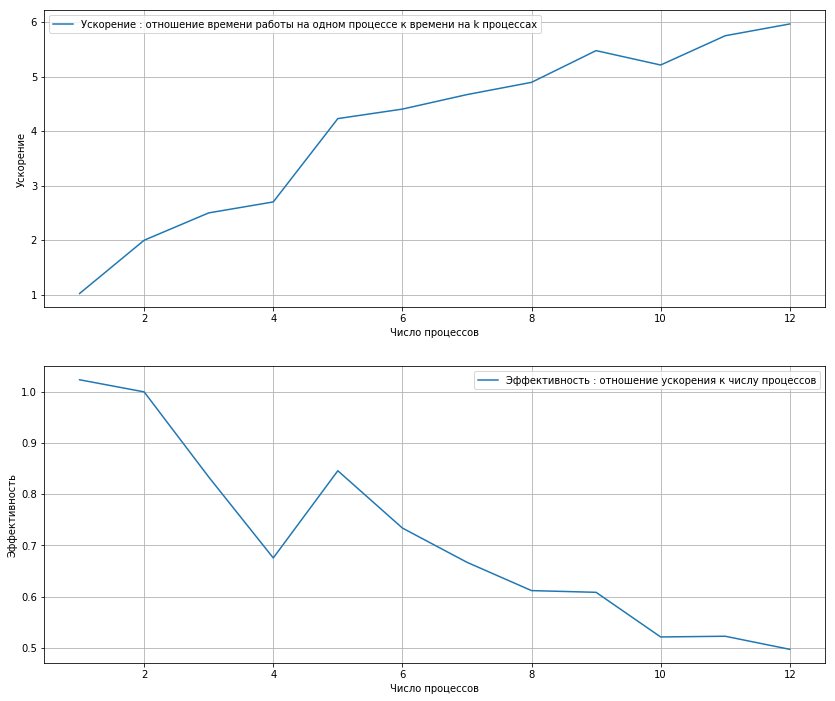

In [9]:
plt.figure(figsize=(14, 12))
plt.subplot(211)
plt.plot(np.arange(1, 13), measured_vals[1]*2 / measured_vals,
         label="Ускорение : отношение времени работы на" + 
         " одном процессе к времени на k процессах")
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(np.arange(1, 13), (measured_vals[1]*2 / measured_vals) / np.arange(1, 13),
         label="Эффективность : отношение ускорения к числу процессов")
plt.xlabel("Число процессов")
plt.ylabel("Эффективность")
plt.legend()
plt.grid()
plt.savefig('acceleration_and_efficiency.png', format='png', dpi=300)
plt.show()